In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#import graphviz 
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import f_regression, mutual_info_regression
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.model_selection import cross_validate, train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree


%matplotlib inline

In [41]:
def CorrelationHeatmap(df):
    corr = df.corr()
#     print(corr)
    plt.figure(figsize=(8,8))
    sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)
    
def NumericalFeatureHistogram(df, datatype):
    if datatype == "bike":
        df.hist(column=["temp", "atemp", "hum", "windspeed"], ec='black', grid=False, figsize=(10,10))
    elif datatype == "video":
        df.hist(figsize=(15, 15), layout=(6, 3), ec='black', grid=False, column=["duration", "height", "width", "bitrate", "framerate", "i", "p", "b", "frames", "i_size", "p_size", "b_size", "size", "o_bitrate", "o_framerate", "o_width", "o_height"])
    
def CategoricalFeatureBoxplot(df, datatype):
    if datatype == "bike":
        for col in ["season", "yr", "mnth", "holiday", "weekday", "workingday", "weathersit"]:
            df.boxplot(by=col, column=["casual", "registered", "cnt"], figsize=(15,6), layout=(1,3))
    elif datatype == "video":
        for col in ["codec", "o_codec"]:
            df.boxplot(by=col, column="utime", figsize=(6,6))

In [42]:
bike_df = pd.read_csv("C:/Users/AJ/Desktop/P4data/Bike-Sharing-Dataset/day.csv")
print(bike_df.head(5))

   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  


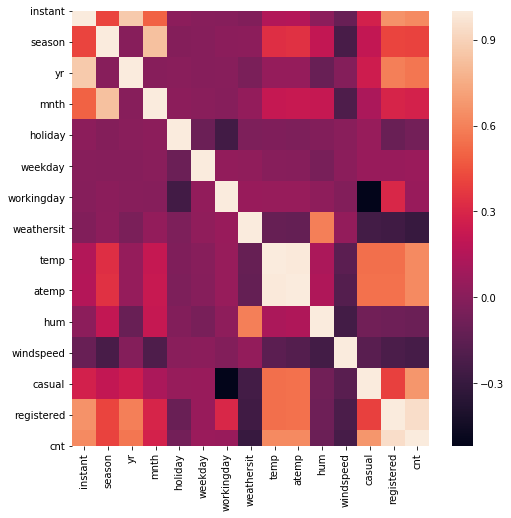

In [43]:
CorrelationHeatmap(bike_df)

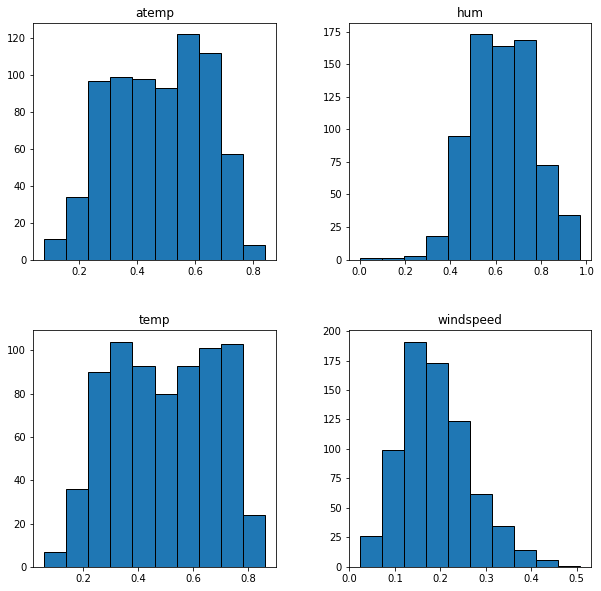

In [44]:
NumericalFeatureHistogram(bike_df, "bike")

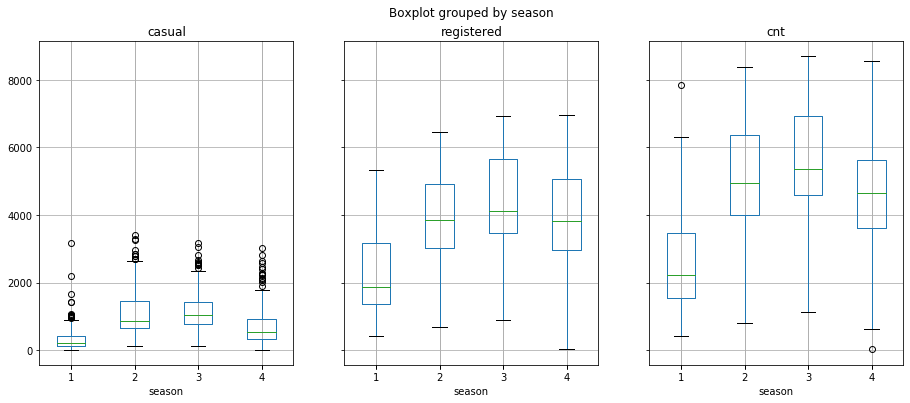

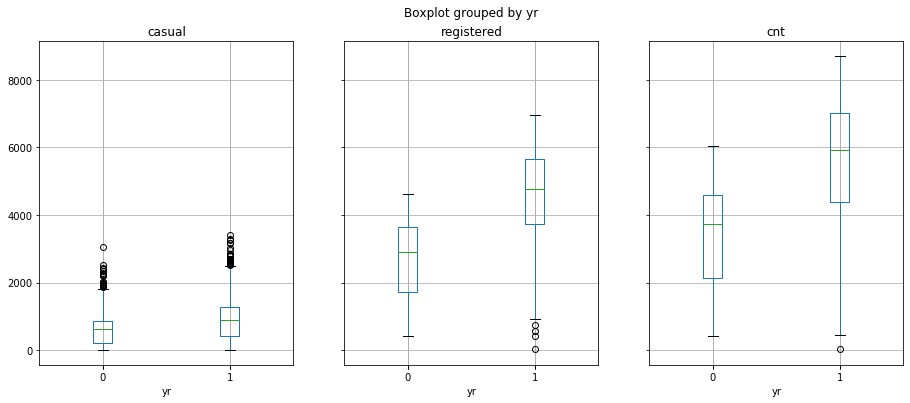

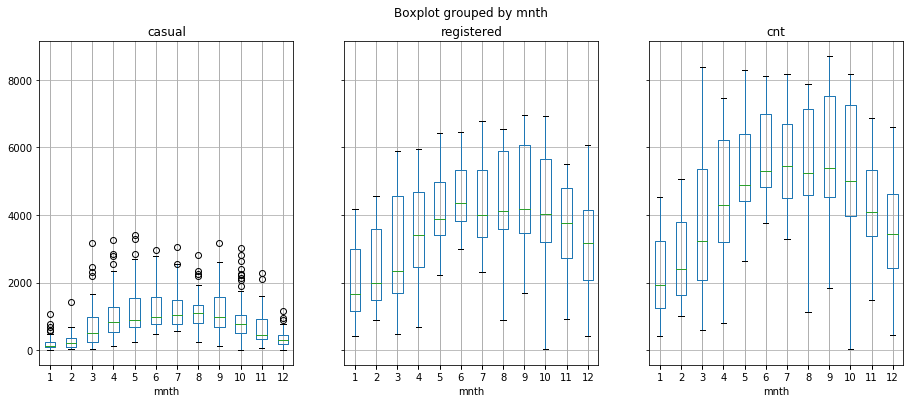

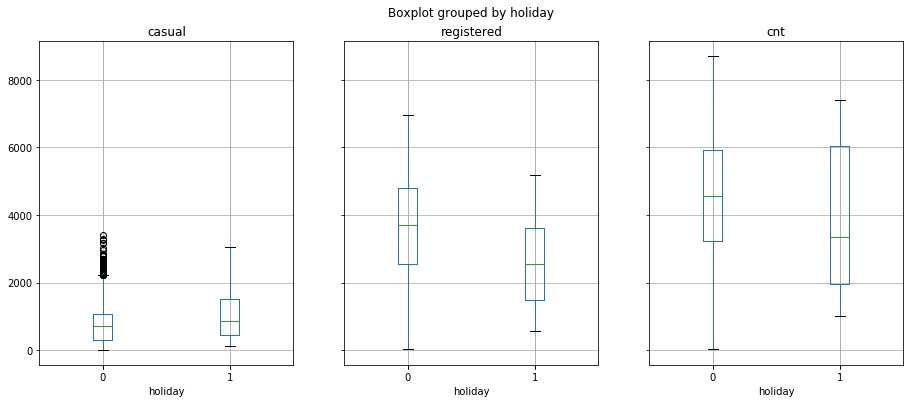

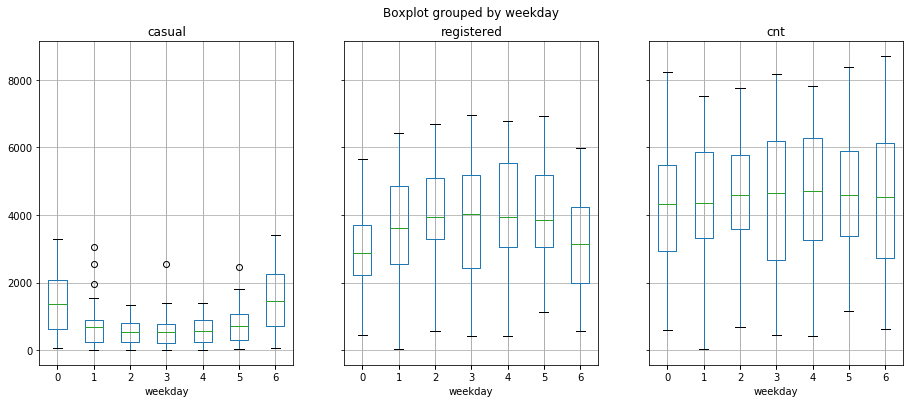

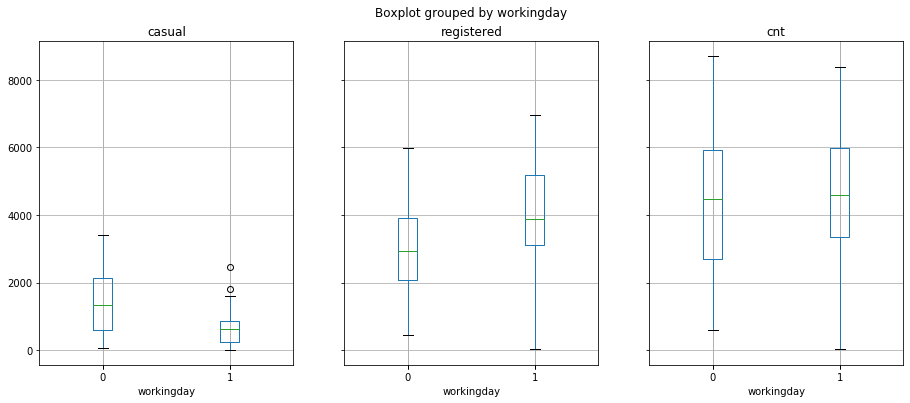

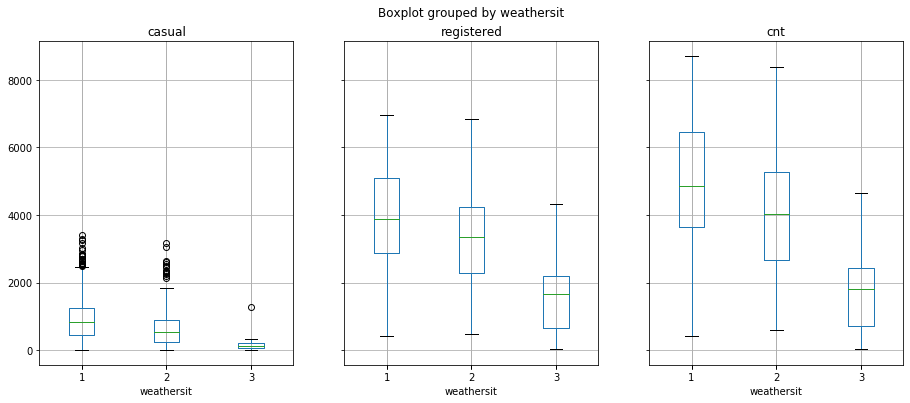

In [45]:
CategoricalFeatureBoxplot(bike_df, "bike")

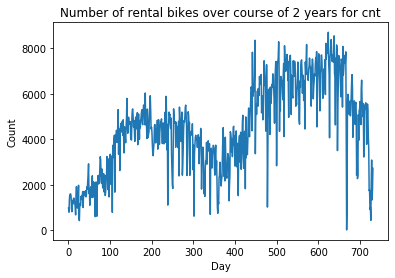

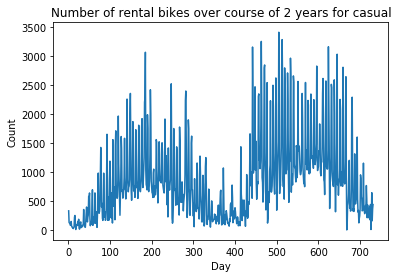

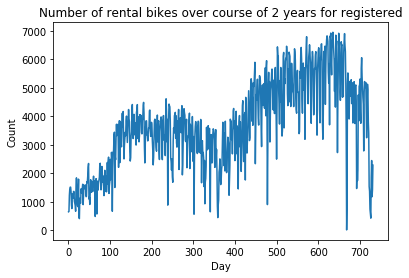

In [46]:
plt.plot(bike_df['instant'], bike_df['cnt'])
plt.ylabel("Count")
plt.xlabel("Day")
plt.title("Number of rental bikes over course of 2 years for cnt")
plt.show()
plt.plot(bike_df['instant'], bike_df['casual'])
plt.ylabel("Count")
plt.xlabel("Day")
plt.title("Number of rental bikes over course of 2 years for casual")
plt.show()
plt.plot(bike_df['instant'], bike_df['registered'])
plt.ylabel("Count")
plt.xlabel("Day")
plt.title("Number of rental bikes over course of 2 years for registered")
plt.show()

In [47]:
video_df = pd.read_csv("C:/Users/AJ/Desktop/P4data/online_video_dataset/transcoding_mesurment.tsv", sep='\t')
print(video_df.head(5))

            id   duration  codec  width  height  bitrate  framerate   i     p  \
0  04t6-jw9czg  130.35667  mpeg4    176     144    54590       12.0  27  1537   
1  04t6-jw9czg  130.35667  mpeg4    176     144    54590       12.0  27  1537   
2  04t6-jw9czg  130.35667  mpeg4    176     144    54590       12.0  27  1537   
3  04t6-jw9czg  130.35667  mpeg4    176     144    54590       12.0  27  1537   
4  04t6-jw9czg  130.35667  mpeg4    176     144    54590       12.0  27  1537   

   b  ...  p_size  b_size    size  o_codec  o_bitrate o_framerate  o_width  \
0  0  ...  825054       0  889537    mpeg4      56000        12.0      176   
1  0  ...  825054       0  889537    mpeg4      56000        12.0      320   
2  0  ...  825054       0  889537    mpeg4      56000        12.0      480   
3  0  ...  825054       0  889537    mpeg4      56000        12.0      640   
4  0  ...  825054       0  889537    mpeg4      56000        12.0     1280   

   o_height   umem  utime  
0       144  225

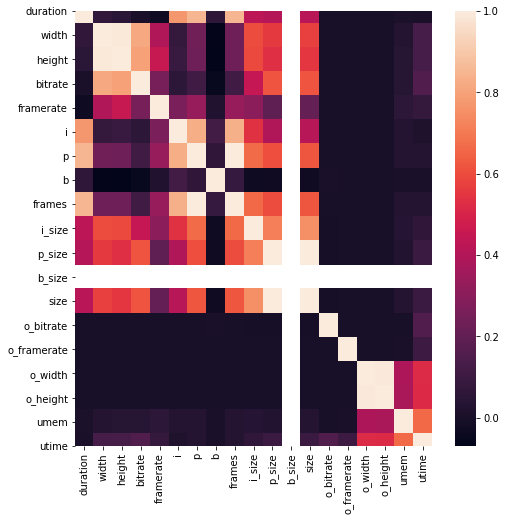

In [48]:
CorrelationHeatmap(video_df)

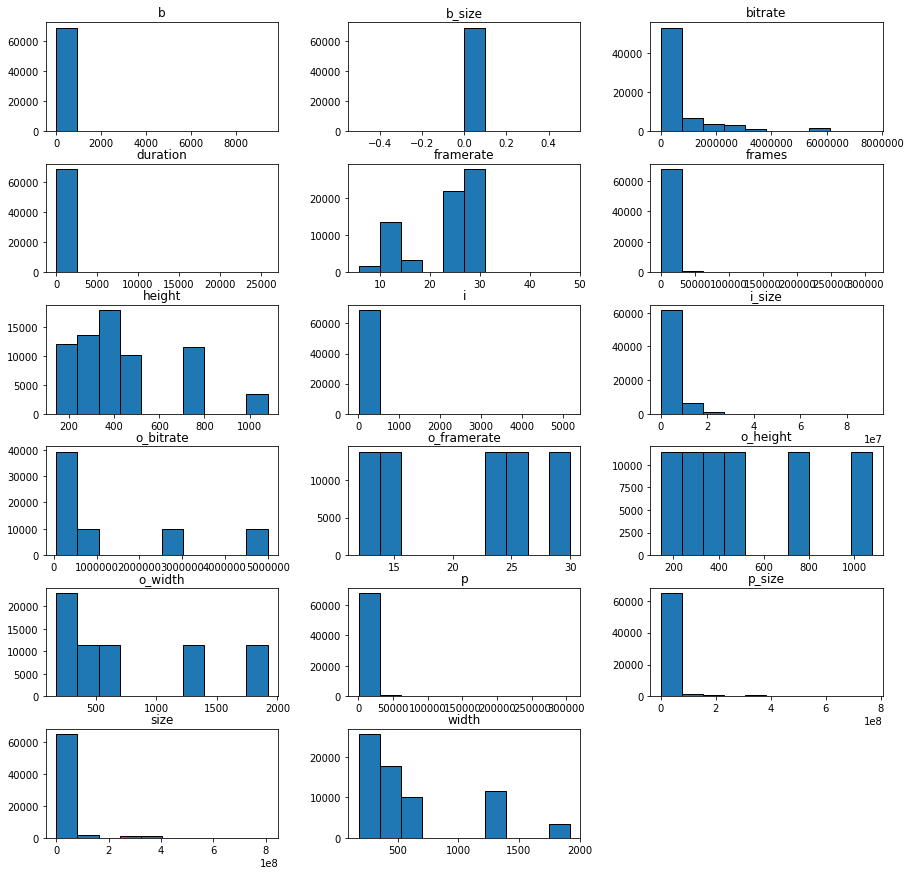

In [49]:
NumericalFeatureHistogram(video_df, "video")

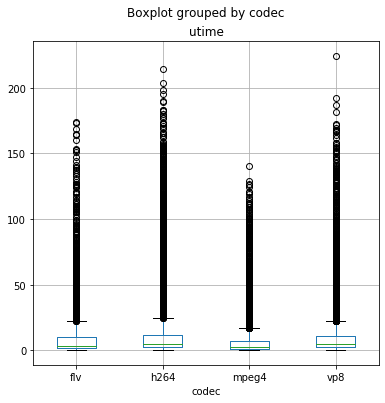

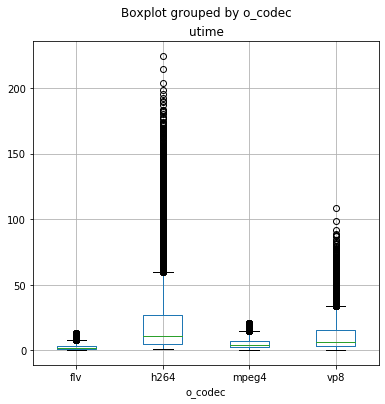

In [50]:
CategoricalFeatureBoxplot(video_df, "video")

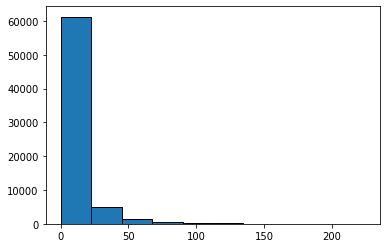

Mean of transcoding times: 9.996354820888516
Median of transcoding times: 4.408


In [51]:
plt.hist(video_df['utime'], ec='black')
plt.show()
print("Mean of transcoding times:", np.mean(video_df['utime']))
print("Median of transcoding times:", np.median(video_df['utime']))

In [63]:
bike_num_col = ["temp", "atemp", "hum", "windspeed"]
bike_cat_col = ["season", "weekday", "weathersit"] #mnth, holiday, yr

video_num_col = ["duration", "height", "bitrate", "framerate", "i", "p", "b", "frames", "i_size", "p_size", 
                 "b_size", "size", "o_bitrate", "o_framerate", "height", "width", "o_height", "o_width"]
video_cat_col = ["codec", "o_codec"]

def TestFeatures(df, dataset):
    if dataset == "bike":
        cat_col = ["season", "weekday", "weathersit", "mnth", "holiday", "yr"]
    elif dataset == "video":
        cat_col = video_cat_col
        for c in cat_col:
            df[c] = df[c].astype("category").cat.codes
        
    cat_inds = [df.columns.get_loc(c) for c in cat_col]
        
    target_col = "cnt" if dataset == "bike" else "utime"
    target = df[target_col]
    df = df.drop(columns=target_col)
    data = df.values
    
    if dataset == "video":
        inds = np.random.choice(len(data), 5000)
        data = data[inds] # takes too long to run on entire dataset
        target = target[inds]
        print(data.shape)

    mi = mutual_info_regression(data, target, discrete_features=cat_inds)
    mi /= np.max(mi)
    
    
    for i, col in enumerate(df.columns):
        print("{} - mi score: {}".format(col, mi[i]))

def Standardize(df, dataset):
    if dataset == "bike":
        num_col = bike_num_col
    elif dataset == "video":
        num_col = video_num_col
        
    for col in num_col: # standardize numerical features
        scaler = StandardScaler()
        df[col] = scaler.fit_transform(df[[col]])
    return df

def Encode(df, dataset):
    if dataset == "bike":
        cat_col = ["season", "weekday", "weathersit"] #mnth
    elif dataset == "video":
        cat_col = video_cat_col
    for col in cat_col: # encode categorical features
        if col in df.columns:
            df = pd.concat([df, pd.get_dummies(df[col], prefix=col)], axis=1).drop([col], axis=1)
    return df
        
def DropFeatures(df, dataset):
    if dataset == "bike":
        rem_col = ["instant", "dteday", "casual", "registered"]
    elif dataset == "video":
        rem_col = ["id", "umem"]
    df = df.drop(columns=rem_col) # drop features
    return df

def TestAndAugmentData(df, dataset, scale=True, test=True):
    df = df.copy()
    if scale:
        df = Standardize(df, dataset)
    df = DropFeatures(df, dataset)
    if test:
        TestFeatures(df, dataset)
    # decide what other features to drop here
#     if dataset == "bike":
#         drop_cols = ["holiday", "workingday", "weekday", "hum", "windspeed"]
#         df = df.drop(columns=drop_cols)
    if dataset == "video":
        drop_cols = ["b", "b_size", "i", "i_size", "p", "p_size"]
        df = df.drop(columns=drop_cols)
    df = Encode(df, dataset)
    return df

def EvalModel(model, data, target):
    rmse_func = make_scorer(mean_squared_error)
    res = cross_validate(model, data, target, cv=10, scoring=rmse_func, return_train_score=True)
    train_rmse = np.sqrt(np.mean(res['train_score']))
    test_rmse = np.sqrt(np.mean(res['test_score']))
    #print("Train RMSE:", train_rmse)
    #print("Test RMSE:", test_rmse)
    return train_rmse, test_rmse

In [64]:
scaled_bike_df = TestAndAugmentData(bike_df, "bike")

season - mi score: 0.4653003309772382
yr - mi score: 0.5988022906545587
mnth - mi score: 0.8182067695436135
holiday - mi score: 0.024787337219646547
weekday - mi score: 0.09724166530650157
workingday - mi score: 0.0557086807001687
weathersit - mi score: 0.14572909213459698
temp - mi score: 0.8379207175918091
atemp - mi score: 1.0
hum - mi score: 0.09678633143018589
windspeed - mi score: 0.12030277466856347


In [65]:
print(scaled_bike_df.head(2))

   yr  mnth  holiday  workingday      temp     atemp       hum  windspeed  \
0   0     1        0           0 -0.826662 -0.679946  1.250171  -0.387892   
1   0     1        0           0 -0.721095 -0.740652  0.479113   0.749602   

   cnt  season_1  ...  weekday_0  weekday_1  weekday_2  weekday_3  weekday_4  \
0  985         1  ...          0          0          0          0          0   
1  801         1  ...          1          0          0          0          0   

   weekday_5  weekday_6  weathersit_1  weathersit_2  weathersit_3  
0          0          1             0             1             0  
1          0          0             0             1             0  

[2 rows x 23 columns]


In [66]:
bike_target = scaled_bike_df["cnt"]
bike_data_df = scaled_bike_df.drop(columns="cnt")
bike_data = bike_data_df.values


train, test = EvalModel(LinearRegression(), bike_data, bike_target)
print("Train RMSE:", train)
print("Test RMSE:", test)

Train RMSE: 797.3134230937001
Test RMSE: 942.9515830170795


In [67]:
scaled_video_df = TestAndAugmentData(video_df, "video")

(5000, 19)
duration - mi score: 0.9017959882200512
codec - mi score: 0.22844247136809673
width - mi score: 0.4496280248720728
height - mi score: 0.4483997549571093
bitrate - mi score: 0.9608914343690241
framerate - mi score: 0.5049281434835322
i - mi score: 0.8497091292704279
p - mi score: 0.905254856195506
b - mi score: 0.020156365576880456
frames - mi score: 0.8946489064192145
i_size - mi score: 0.884054356030163
p_size - mi score: 0.8554934783443341
b_size - mi score: 0.004258669351916909
size - mi score: 0.8424002968497453
o_codec - mi score: 0.8403318547407623
o_bitrate - mi score: 0.1281181415113323
o_framerate - mi score: 0.09190747692164764
o_width - mi score: 1.0
o_height - mi score: 0.9981788600098525


In [68]:
print(scaled_video_df.head(2))

   duration     width    height   bitrate  framerate    frames      size  \
0  -0.54327 -0.969273 -1.116197 -0.583333  -1.555936 -0.825201 -0.445729   
1  -0.54327 -0.969273 -1.116197 -0.583333  -1.555936 -0.825201 -0.445729   

   o_bitrate  o_framerate   o_width  o_height  utime  codec_0  codec_1  \
0  -0.765453    -1.378218 -1.026856 -1.138803  0.612        0        0   
1  -0.765453    -1.378218 -0.790773 -0.834975  0.980        0        0   

   codec_2  codec_3  o_codec_0  o_codec_1  o_codec_2  o_codec_3  
0        1        0          0          0          1          0  
1        1        0          0          0          1          0  


In [69]:
video_target = scaled_video_df["utime"]
video_data_df = scaled_video_df.drop(columns="utime")
video_data = video_data_df.values

train, test = EvalModel(LinearRegression(), video_data, video_target)
print("Train RMSE:", train)
print("Test RMSE:", test)

Train RMSE: 11.005362065908827
Test RMSE: 11.082176230704112


In [13]:
# 3.2.1

In [80]:
def sweepy_boi(classifier, data, target):
    powers = np.arange(-3,4)
    er_by_k = np.zeros((len(powers), 2))
    for i, power in enumerate(powers):
        k = 10.0**power

        if classifier == 'lasso':
            train_rsme, test_rsme = EvalModel(Lasso(alpha=k,max_iter=10000),data, target)
            er_by_k[i, 0]=train_rsme
            er_by_k[i, 1]=test_rsme
        elif classifier == 'ridge':
            train_rsme, test_rsme = EvalModel(Ridge(alpha=k,max_iter=10000),data,target)
            er_by_k[i, 0]=train_rsme
            er_by_k[i, 1]=test_rsme
            
    return er_by_k



lasso_bike_er_by_k = sweepy_boi('lasso',bike_data,bike_target)
lasso_video_er_by_k = sweepy_boi('lasso',video_data,video_target)
ridge_bike_er_by_k = sweepy_boi('ridge',bike_data,bike_target)
ridge_video_er_by_k = sweepy_boi('ridge',video_data,video_target)



C:\Users\shb20\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1352010.0459238887, tolerance: 199790.9642304414
  positive)
C:\Users\shb20\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3194997.7857789993, tolerance: 255245.10859148938
  positive)
C:\Users\shb20\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3040464.942407012, tolerance: 271504.2992972644
  positive)
C:\Users\shb20\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Dualit

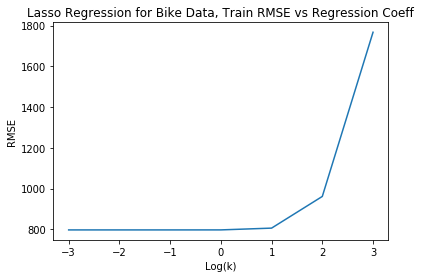

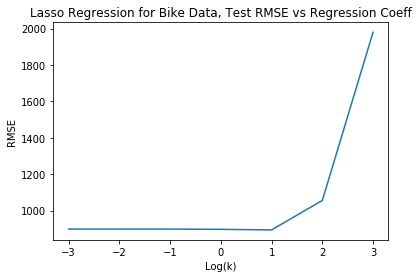

min test RSME =  893.4860556364001 at alpha =  10.0


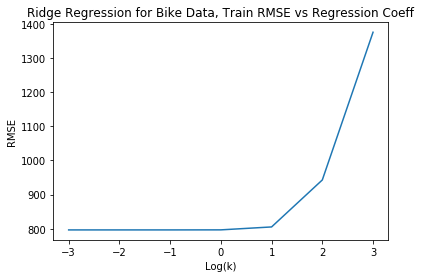

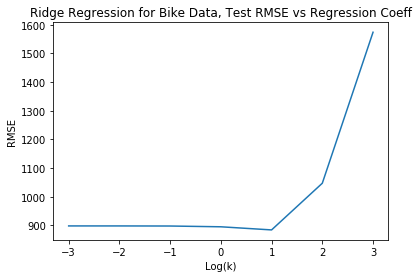

min test RSME =  884.2326658829454 at alpha =  10.0


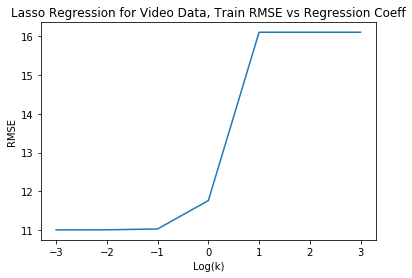

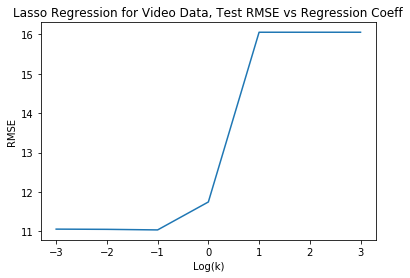

min test RSME =  11.034838457866794 at alpha =  0.1


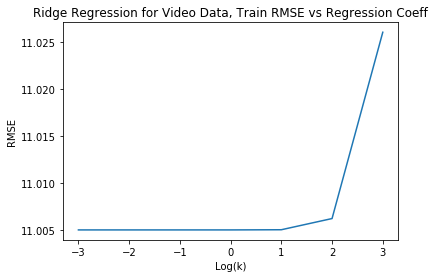

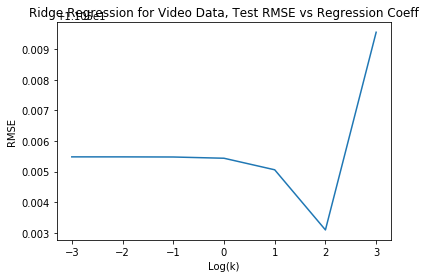

min test RSME =  11.053093406214721 at alpha =  100.0


In [81]:
ks = 10.0 ** np.arange(-3,4)
plt.plot(np.log10(ks),lasso_bike_er_by_k[:, 0])
plt.title("Lasso Regression for Bike Data, Train RMSE vs Regression Coeff")
plt.xlabel("Log(k)")
plt.ylabel("RMSE")
plt.show()

ks = 10.0 ** np.arange(-3,4)
plt.plot(np.log10(ks),lasso_bike_er_by_k[:, 1])
plt.title("Lasso Regression for Bike Data, Test RMSE vs Regression Coeff")
plt.xlabel("Log(k)")
plt.ylabel("RMSE")
plt.show()

print("min test RSME = ", np.min(lasso_bike_er_by_k[:, 1]), "at alpha = ", (ks[np.argmin(lasso_bike_er_by_k[:, 1])] ))

plt.plot(np.log10(ks),ridge_bike_er_by_k[:, 0])
plt.title("Ridge Regression for Bike Data, Train RMSE vs Regression Coeff")
plt.xlabel("Log(k)")
plt.ylabel("RMSE")
plt.show()

plt.plot(np.log10(ks),ridge_bike_er_by_k[:, 1])
plt.title("Ridge Regression for Bike Data, Test RMSE vs Regression Coeff")
plt.xlabel("Log(k)")
plt.ylabel("RMSE")
plt.show()
      
print("min test RSME = ", np.min(ridge_bike_er_by_k[:, 1]), "at alpha = ", (ks[np.argmin(ridge_bike_er_by_k[:, 1])] ))

plt.plot(np.log10(ks),lasso_video_er_by_k[:, 0])
plt.title("Lasso Regression for Video Data, Train RMSE vs Regression Coeff")
plt.xlabel("Log(k)")
plt.ylabel("RMSE")
plt.show()

plt.plot(np.log10(ks),lasso_video_er_by_k[:, 1])
plt.title("Lasso Regression for Video Data, Test RMSE vs Regression Coeff")
plt.xlabel("Log(k)")
plt.ylabel("RMSE")
plt.show()
      
print("min test RSME = ", np.min(lasso_video_er_by_k[:, 1]), "at alpha = ", (ks[np.argmin(lasso_video_er_by_k[:, 1])] ))

plt.plot(np.log10(ks),ridge_video_er_by_k[:, 0])
plt.title("Ridge Regression for Video Data, Train RMSE vs Regression Coeff")
plt.xlabel("Log(k)")
plt.ylabel("RMSE")
plt.show()

plt.plot(np.log10(ks),ridge_video_er_by_k[:, 1])
plt.title("Ridge Regression for Video Data, Test RMSE vs Regression Coeff")
plt.xlabel("Log(k)")
plt.ylabel("RMSE")
plt.show()

print("min test RSME = ", np.min(ridge_video_er_by_k[:, 1]), "at alpha = ", (ks[np.argmin(ridge_video_er_by_k[:, 1])] ))


In [60]:
scaled_bike_data = bike_data

unscaled_bike_df = TestAndAugmentData(bike_df, "bike", test=False, scale=False)
unscaled_bike_data_df = unscaled_bike_df.drop(columns="cnt")
unscaled_bike_data = unscaled_bike_data_df.values

train_rsme_bike_lr, test_rsme_bike_lr=EvalModel(LinearRegression(), unscaled_bike_data, bike_target)

print("Bike data, Linear Regression, unscaled data:")
print("Train RSME: ",train_rsme_bike_lr)
print("Test RSME: ",test_rsme_bike_lr )

train_rsme_bike_lr_scale, test_rsme_bike_lr_scale=EvalModel(LinearRegression(), scaled_bike_data, bike_target)

print("Bike data, Linear Regression, scaled data:")
print("Train RSME: ",train_rsme_bike_lr_scale)
print("Test RSME: ",test_rsme_bike_lr_scale )

train_rsme_bike_lasso, test_rsme_bike_lasso = EvalModel(Lasso(alpha=10,max_iter=10000), unscaled_bike_data, bike_target)

print("Bike data, Lasso Regularization, unscaled data:")
print("Train RSME: ",train_rsme_bike_lasso)
print("Test RSME: ",test_rsme_bike_lasso)

train_rsme_bike_lasso_scale, test_rsme_bike_lasso_scale = EvalModel(Lasso(alpha=10,max_iter=10000),scaled_bike_data, bike_target)

print("Bike data, Lasso Regularization, scaled data:")
print("Train RSME: ",train_rsme_bike_lasso_scale)
print("Test RSME: ", test_rsme_bike_lasso_scale)

train_rsme_bike_ridge, test_rsme_bike_ridge = EvalModel(Ridge(alpha=10,max_iter=10000),unscaled_bike_data, bike_target)

print("Bike data, Ridge Regularization, unscaled data:")
print("Train RSME: ",train_rsme_bike_ridge)
print("Test RSME: ", test_rsme_bike_ridge)

train_rsme_bike_ridge_scale, test_rsme_bike_ridge_scale = EvalModel(Ridge(alpha=10,max_iter=10000),scaled_bike_data, bike_target)

print("Bike data, Ridge Regularization, scaled data:")
print("Train RSME: ",train_rsme_bike_ridge_scale)
print("Test RSME: ", test_rsme_bike_ridge_scale)

Bike data, Linear Regression, unscaled data:
Train RSME:  796.769840846871
Test RSME:  898.1630729439788
Bike data, Linear Regression, scaled data:
Train RSME:  796.7698408468711
Test RSME:  898.1630729439821
Bike data, Lasso Regularization, unscaled data:
Train RSME:  828.4107563113861
Test RSME:  910.8984817875928
Bike data, Lasso Regularization, scaled data:
Train RSME:  805.5754999847206
Test RSME:  893.4860556364001
Bike data, Ridge Regularization, unscaled data:
Train RSME:  844.6148318545329
Test RSME:  918.3625504940599
Bike data, Ridge Regularization, scaled data:
Train RSME:  805.4775144580378
Test RSME:  884.2326658829454


In [19]:
scaled_video_data = video_data

unscaled_video_df = TestAndAugmentData(video_df, "video", test=False, scale=False)
unscaled_video_data_df = unscaled_video_df.drop(columns="utime")
unscaled_video_data = unscaled_video_data_df.values

train_rsme_bike_lr, test_rsme_bike_lr=EvalModel(LinearRegression(), unscaled_video_data, video_target)

print("Video data, Linear Regression, unscaled data:")
print("Train RSME: ",train_rsme_bike_lr)
print("Test RSME: ",test_rsme_bike_lr )

train_rsme_bike_lr_scale, test_rsme_bike_lr_scale=EvalModel(LinearRegression(), scaled_video_data, video_target)

print("Video data, Linear Regression, scaled data:")
print("Train RSME: ",train_rsme_bike_lr_scale)
print("Test RSME: ",test_rsme_bike_lr_scale )

train_rsme_bike_lasso, test_rsme_bike_lasso = EvalModel(Lasso(alpha=0.1,max_iter=10000), unscaled_video_data, video_target)

print("Video data, Lasso Regularization, unscaled data:")
print("Train RSME: ",train_rsme_bike_lasso)
print("Test RSME: ",test_rsme_bike_lasso)

train_rsme_bike_lasso_scale, test_rsme_bike_lasso_scale = EvalModel(Lasso(alpha=0.1,max_iter=10000),scaled_video_data, video_target)

print("Video data, Lasso Regularization, scaled data:")
print("Train RSME: ",train_rsme_bike_lasso_scale)
print("Test RSME: ", test_rsme_bike_lasso_scale)

train_rsme_bike_ridge, test_rsme_bike_ridge = EvalModel(Ridge(alpha=100,max_iter=10000),unscaled_video_data, video_target)

print("Video data, Ridge Regularization, unscaled data:")
print("Train RSME: ",train_rsme_bike_ridge)
print("Test RSME: ", test_rsme_bike_ridge)

train_rsme_bike_ridge_scale, test_rsme_bike_ridge_scale = EvalModel(Ridge(alpha=100,max_iter=10000),scaled_video_data, video_target)

print("Video data, Ridge Regularization, scaled data:")
print("Train RSME: ",train_rsme_bike_ridge_scale)
print("Test RSME: ", test_rsme_bike_ridge_scale)

Video data, Linear Regression, unscaled data:
Train RSME:  11.004983665772537
Test RSME:  11.055480940308481
Video data, Linear Regression, scaled data:
Train RSME:  11.005020230185162
Test RSME:  11.054358362041757
Video data, Lasso Regularization, unscaled data:
Train RSME:  11.020056807025032
Test RSME:  11.059277167397072
Video data, Lasso Regularization, scaled data:
Train RSME:  11.029239248165286
Test RSME:  11.034838457866794


C:\Users\shb20\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=4.98115e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\shb20\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=5.06802e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\shb20\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=4.95833e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\shb20\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=5.12192e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\shb20\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=6.24591e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\shb20\Anaconda3\lib\site-packages\sklearn\linear_mo

Video data, Ridge Regularization, unscaled data:
Train RSME:  11.00508479481673
Test RSME:  11.055118303465182
Video data, Ridge Regularization, scaled data:
Train RSME:  11.006193509278049
Test RSME:  11.053093406214721


In [69]:
#3.2.2

In [74]:
video_num_col = ["duration", "height", "bitrate", "framerate", "frames", "size", "o_bitrate", 
                 "o_framerate", "height", "width", "o_height", "o_width"] # removed i p and b values

def poly_reg(degree, data, labels, dataset):
    poly = PolynomialFeatures(degree)
    if dataset == "bike":
        data = scaled_bike_df[bike_num_col].values
#     else:
#         data = scaled_video_df[video_num_col].values
    data = poly.fit_transform(data)
    if dataset == "bike":
        data = np.concatenate((data, scaled_bike_df.drop(columns=bike_num_col+["cnt"]).values), axis=1)
#     else:
#         data = np.concatenate((data, scaled_video_df.drop(columns=video_num_col+["utime"]).values), axis=1)
    print(data.shape)
    alpha = 10 if dataset == "bike" else 100
    train_rsme_bike_poly, test_rsme_bike_poly=EvalModel(Ridge(alpha=alpha, max_iter=10000), data, labels)
    print("Polynomial Regression Train RSME: ", train_rsme_bike_poly)
    print("Polynomial Regression Test RSME: ", test_rsme_bike_poly)

In [70]:
degrees = np.arange(1,7)
print("Bike results")
for degree in degrees:
    print("For polynomial degree", degree)
    poly_reg(degree, bike_data, bike_target, "bike")

Bike results
For polynomial degree 1
(731, 23)
Polynomial Regression Train RSME:  805.4775144580378
Polynomial Regression Test RSME:  884.2326658829458
For polynomial degree 2
(731, 33)
Polynomial Regression Train RSME:  711.4878797611351
Polynomial Regression Test RSME:  860.9061803914217
For polynomial degree 3
(731, 53)
Polynomial Regression Train RSME:  627.0064910943512
Polynomial Regression Test RSME:  719.0672331589852
For polynomial degree 4
(731, 88)
Polynomial Regression Train RSME:  615.0120364241
Polynomial Regression Test RSME:  740.6885480354008
For polynomial degree 5
(731, 144)
Polynomial Regression Train RSME:  590.5697720501815
Polynomial Regression Test RSME:  868.173428374974
For polynomial degree 6
(731, 228)
Polynomial Regression Train RSME:  568.0443868217274
Polynomial Regression Test RSME:  1845.5529796009591


In [75]:
print("Video results")
degrees = np.arange(1,4)
for degree in degrees:
    print("For polynomial degree", degree)
    poly_reg(degree, video_data, video_target, "video")

Video results
For polynomial degree 1
(68784, 20)
Polynomial Regression Train RSME:  11.006193509278049
Polynomial Regression Test RSME:  11.053093406214721
For polynomial degree 2
(68784, 210)
Polynomial Regression Train RSME:  6.318154649960667
Polynomial Regression Test RSME:  7.732446553643624
For polynomial degree 3
(68784, 1540)
Polynomial Regression Train RSME:  3.803940491194004
Polynomial Regression Test RSME:  528.8320737766745


In [72]:
video_data_inv = scaled_video_df[["o_bitrate", "o_framerate", "o_width", "o_height"]].values
video_data_inv = np.power(video_data_inv,-1)
video_data_with_inv = np.concatenate((video_data, video_data_inv),axis=1)

poly = PolynomialFeatures(2)
video_data_poly_with_inv = poly.fit_transform(video_data_with_inv)
print(video_data_poly_with_inv.shape)
train_rsme_video_poly_with_inv, test_rsme_video_poly_with_inv=EvalModel(Ridge(alpha=100, max_iter=10000), video_data_poly_with_inv, video_target)
print("Polynomial Regression with inv Train RSME: ", train_rsme_video_poly_with_inv)
print("Polynomial Regression with inv Test RSME: ", test_rsme_video_poly_with_inv)


(68784, 300)
Polynomial Regression with inv Train RSME:  6.2731548663073475
Polynomial Regression with inv Test RSME:  7.699598986001197


In [ ]:
#3.3.3

In [74]:
def ValidateModel(model, data, target):
    X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=0)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    test_rmse = mean_squared_error(y_test, pred)
    train_rmse = mean_squared_error(y_train, model.predict(X_train))
    return np.sqrt(train_rmse), np.sqrt(test_rmse)

In [25]:
nn = MLPRegressor(solver='adam', alpha=0.1,
...    hidden_layer_sizes=(100,100,50), random_state=1, max_iter = 2000)

train_rsme, test_rsme = ValidateModel(nn, bike_data, bike_target)

print("Bike results")
print("MLP Train RSME:", train_rsme)
print("MLP Test RSME:",test_rsme)

Bike results
MLP Train RSME: 365.4986251456236
MLP Test RSME: 650.6926732836481


C:\Users\shb20\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [14]:
nn = MLPRegressor(solver='adam', alpha=0.1,
...    hidden_layer_sizes=(100,100,50), random_state=1, max_iter = 2000)

train_rsme, test_rsme = ValidateModel(nn, video_data, video_target)

print("Video results")
print("MLP Train RSME:", train_rsme)
print("MLP Test RSME:",test_rsme)

C:\Users\shb20\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:573: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
C:\Users\shb20\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:573: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
C:\Users\shb20\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:573: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
C:\Users\shb20\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:573: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


Video results
MLP Train RSME: 3.605643470671629
MLP Test RSME: 5.67737249730512


In [115]:
nn_identity = MLPRegressor(solver='adam', alpha=1e-4, activation='identity',
...    hidden_layer_sizes=(50,20), random_state=1, max_iter = 2000)

train_rsme_identity, test_rsme_identity = EvalModel(nn_identity, bike_data, bike_target)

print("MLP, identity activation Train RSME:", train_rsme_identity)
print("MLP, identity activation Test RSME:",test_rsme_identity)

nn_logistic = MLPRegressor(solver='adam', alpha=1e-4, activation ='logistic',
...    hidden_layer_sizes=(50,20), random_state=1, max_iter = 2000)

train_rsme_logistic, test_rsme_logistic = EvalModel(nn_logistic, bike_data, bike_target)

print("MLP, logistic activation Train RSME:", train_rsme_logistic)
print("MLP, logistic activation Test RSME:",test_rsme_logistic)

nn_tanh = MLPRegressor(solver='adam', alpha=1e-4, activation='tanh',
...    hidden_layer_sizes=(50,20), random_state=1, max_iter = 2000)

train_rsme_tanh, test_rsme_tanh = EvalModel(nn_tanh, bike_data, bike_target)

print("MLP, tanh activation Train RSME:", train_rsme_tanh)
print("MLP, tanh activation Test RSME:",test_rsme_tanh)

nn = MLPRegressor(solver='adam', alpha=1e-4,
...    hidden_layer_sizes=(50,20), random_state=1, max_iter = 2000)

train_rsme, test_rsme = EvalModel(nn, bike_data, bike_target)

print("MLP, relu activation Train RSME:", train_rsme)
print("MLP, relu activation Test RSME:",test_rsme)

MLP, identity activation Train RSME: 798.406852470478
MLP, identity activation Test RSME: 899.6093531548374


C:\Users\AJ\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\AJ\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\AJ\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\AJ\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceW

MLP, logistic activation Train RSME: 4771.019520961908
MLP, logistic activation Test RSME: 4500.380149097334


C:\Users\AJ\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\AJ\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\AJ\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\AJ\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceW

MLP, tanh activation Train RSME: 4742.7110902955665
MLP, tanh activation Test RSME: 4470.47876395506


C:\Users\AJ\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\AJ\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\AJ\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLP, relu activation Train RSME: 751.139575412604
MLP, relu activation Test RSME: 863.3765486761946


In [ ]:
#3.2.4

In [112]:
rf=RandomForestRegressor(n_estimators=500, max_depth=30, max_features=10)

train_rsme_rf, test_rsme_rf = ValidateModel(rf, bike_data, bike_target)

print("Bike results")
print("Train RSME:", train_rsme_rf)
print("Test RSME:",test_rsme_rf)

Bike results
Train RSME: 246.9606329072829
Test RSME: 665.9050689450775


In [111]:
rf=RandomForestRegressor(n_estimators=500, max_depth=30, max_features=10)

train_rsme_rf, test_rsme_rf = EvalModel(rf, bike_data, bike_target)

print("Bike results")
print("Train RSME:", train_rsme_rf)
print("Test RSME:",test_rsme_rf)

Bike results
Train RSME: 241.75823252915052
Test RSME: 834.1889847794617


In [116]:
rf=RandomForestRegressor(n_estimators=500, max_depth=30, max_features='auto')

train_rsme_rf, test_rsme_rf = ValidateModel(rf, video_data, video_target)

print("Video results")
print("Train RSME:", train_rsme_rf)
print("Test RSME:",test_rsme_rf)

Video results
Train RSME: 0.6151939243142157
Test RSME: 1.5589591880900244


In [117]:
rf=RandomForestRegressor(n_estimators=500, max_depth=30, max_features='auto')

train_rsme_rf, test_rsme_rf = EvalModel(rf, video_data, video_target)

print("Video results")
print("Train RSME:", train_rsme_rf)
print("Test RSME:",test_rsme_rf)

Video results
Train RSME: 0.5007322799445543
Test RSME: 4.4071399278109595


In [85]:
rf_oob=RandomForestRegressor(n_estimators=150, max_depth=15, max_features='auto', oob_score=True)

rf_oob.fit(video_data, video_target)

oob_error = 1 - rf_oob.oob_score_
print('Out of Bag error is: ', oob_error)
R_2 = rf_oob.score(video_data, video_target)
print("R^2 score is ", R_2)


Out of Bag error is:  0.009834003767659638
R^2 score is  0.9970565090781095


In [72]:
clf = tree.DecisionTreeRegressor()
clf=clf.fit(bike_data, bike_target, )
#tree.plot_tree(clf, max_depth=4,feature_names = ['yr','mnth','holiday','workingday','temp','atemp','hum','windspeed','season_1','season2','season3','season4','weekday_0','weekday_1','weekday_2','weekday_3','weekday_4','weekday_5','weekday_6','weathersit_1','weathersit_2','weathersit_3'])
plt.figure(figsize=(160,160))
tree.plot_tree(clf, max_depth=4,feature_names = ['yr','mnth','holiday','workingday','temp','atemp','hum','windspeed','season_1','season2','season3','season4','weekday_0','weekday_1','weekday_2','weekday_3','weekday_4','weekday_5','weekday_6','weathersit_1','weathersit_2','weathersit_3'])
plt.show()

In [87]:
clf = tree.DecisionTreeRegressor()
clf=clf.fit(bike_data, bike_target, )
#tree.plot_tree(clf, max_depth=4,feature_names = ['yr','mnth','holiday','workingday','temp','atemp','hum','windspeed','season_1','season2','season3','season4','weekday_0','weekday_1','weekday_2','weekday_3','weekday_4','weekday_5','weekday_6','weathersit_1','weathersit_2','weathersit_3'])
plt.figure(figsize=(160,160))
tree.plot_tree(clf, max_depth=2,feature_names = ['yr','mnth','holiday','workingday','temp','atemp','hum','windspeed','season_1','season2','season3','season4','weekday_0','weekday_1','weekday_2','weekday_3','weekday_4','weekday_5','weekday_6','weathersit_1','weathersit_2','weathersit_3'])
plt.show()